In [61]:
import pandas as pd
from ydata_profiling import ProfileReport
import missingno as msno
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

from xgboost import XGBClassifier
import shap
shap.initjs()

In [62]:
# 실수형 데이터 모음
float_data = [
    'age','ainc','DI1_ag',
    'DI2_ag','DI3_ag','DI5_ag',
    'DI6_ag','DM2_ag','DM3_ag',
    'DM4_ag','DJ2_ag','DJ4_ag',
    'DE2_ag','DE1_ag','DC1_ag',
    'DC2_ag','DC3_ag','DC4_ag',
    'DC5_ag','DC6_ag','DC7_ag',
    'DC11_ag','DC12_ag','DF2_ag',
    'DL1_ag','DJ8_ag','DJ6_ag',
    'DH4_ag','DH2_ag','DH3_ag',
    'DH6_ag','DH7_ag','DN1_ag',
    'DK8_ag','DK9_ag','DK4_ag',
    'DM8_ag','DF1_ya','DJ9_ya',
    'LQ1_mn','LQ2_mn','EQ5D',
    'AC3','AC3_1_01','AC3_1_02',
    'AC3_1_03','AC3_1_04','AC3_1_05',
    'AC3_2_01','AC3_2_02','AC3_2_03',
    'AC3_2_04','AC3_2_05','ij_expr',
    'MH1_1','MO1_1','EC_wht_23',
    'BD2','BD2_14','BA2_2_2',
    'BA2_2_4','BA2_2_6','sc_seatblt',
    'sc_seatblt2','sc_seatblt3','BP16_1',
    'BP16_2','BP16_11','BP16_12',
    'BP16_13','BP16_14','BP16_21',
    'BP16_22','BP16_23','BP16_24',
    'mh_PHQ_S','mh_GAD_S','mh_stress',
    'BS2_1','BS2_2','BS3_2',
    'BS3_3','BS6_2','BS6_2_1',
    'BS6_2_2','BS6_3','BS6_4',
    'BS6_4_1','BS6_4_2','BS12_47_1',
    'BS12_47_2','BS2','BS10_2',
    'BS10_3','sm_presnt','BE3_72',
    'BE3_73','BE3_74','BE3_82',
    'BE3_83','BE3_84','BE3_92',
    'BE3_93','BE3_94','BE3_76',
    'BE3_77','BE3_78','BE3_86',
    'BE3_87','BE3_88','BE8_1',
    'BE8_2','BE3_32','BE3_33',
    'pa_aerobic','LW_mp_a','LW_ms_a',
    'LW_pr_1','LW_mt_a1','LW_mt_a2',
    'LW_br_ch','LW_br_dur','LW_br_yy',
    'LW_br_mm','HE_fst','HE_dprg',
    'HE_PLS_15','HE_PLS_30','HE_sbp1',
    'HE_dbp1','HE_sbp2','HE_dbp2',
    'HE_sbp3','HE_dbp3','HE_sbp',
    'HE_dbp','HE_ht','HE_wt',
    'HE_wc','HE_nc','HE_BMI',
    'HE_glu','HE_HbA1c','HE_insulin',
    'HE_chol','HE_HDL_st2','HE_TG',
    'HE_LDL_drct','HE_ast','HE_alt',
    'HE_HB','HE_HCT','HE_BUN',
    'HE_crea','HE_WBC','HE_RBC',
    'HE_Bplt','HE_Uacid','HE_df',
    'HE_dog','HE_cat','HE_birch',
    'HE_oak','HE_Jhop','HE_ragweed',
    'HE_Uph','HE_Usg','HE_Ucrea',
    'HE_Ualb','HE_Ukal','HE_Ucot',
    'HE_fvc','HE_fvcp','HE_fev1',
    'HE_fev1p','HE_fev1fvc','HE_fev6',
    'HE_fef25_75','HE_pef','HE_cough2',
    'HE_sput2','HE_PFTag','O_DTD',
    'O_DTP','O_DFTD','O_DMFTP',
    'O_IMP_UI','O_IMP_UM','O_IMP_LI',
    'O_IMP_LM','O_BR_N_U','O_BR_N_L',
    'GS_mea_r_1','GS_mea_r_2','GS_mea_r_3',
    'GS_mea_l_1','GS_mea_l_2','GS_mea_l_3',
    'T_HR500_RT','T_HR1000_RT','T_HR2000_RT',
    'T_HR4000_RT','T_HR8000_RT','T_HR500_LT',
    'T_HR1000_LT','T_HR2000_LT','T_HR4000_LT',
    'T_HR8000_LT','T_VHIT_GA_R','T_VHIT_GA_L',
    'E_Dr_dsph','E_Dr_dcyl','E_Dr_a',
    'E_Dl_dsph','E_Dl_dcyl','E_Dl_a',
    'E_Pr_1','E_Pl_1','IAQ_PM2_5',
    'IAQ_CO2','IAQ_HCHO','IAQ_TVOC',
    'IAQ_Benzene','IAQ_Toluene','IAQ_Ethylbenzene',
    'IAQ_Xylene','IAQ_Styrene','IAQ_PM2_5_atmos',
    'IAQ_01_Y','IAQ_01_M','IAQ_06_1N',
    'IAQ_06_2N','IAQ_06_3N','IAQ_08_1_1',
    'IAQ_11_2_1','IAQ_11_3H','IAQ_11_3M',
    'IAQ_13_1F','IAQ_13_2F','IAQ_13_3F',
    'IAQ_13_4F','IAQ_13_1H','IAQ_13_1M',
    'IAQ_13_2H','IAQ_13_2M','IAQ_13_3H',
    'IAQ_13_3M','IAQ_13_4H','IAQ_13_4M',
    'IAQ_22_1','IAQ_22_3','IAQ_23_2',
    'VOC_WKD_H','VOC_Ucrea','VOC_BMA',
    'VOC_BMA_cr','VOC_2MHA','VOC_2MHA_cr',
    'VOC_34MHA','VOC_34MHA_cr','VOC_PGA',
    'VOC_PGA_cr','VOC_MA','VOC_MA_cr',
    'VOC_SPMA','VOC_SPMA_cr','VOC_3HPMA',
    'VOC_3HPMA_cr','VOC_BPMA','VOC_BPMA_cr',
    'VOC_DHBMA','VOC_DHBMA_cr','Y_MTM_S1',
    'Y_MTM_S2','Y_MTM_D1','Y_MTM_D2',
    'Y_FM_S1','Y_FM_S2','Y_FM_D1',
    'Y_FM_D2','Y_MLK_ST','Y_WN_ST',
    'N_MEAL_T','NF_EN','NF_WATER',
    'NF_PROT','NF_FAT','NF_SFA',
    'NF_MUFA','NF_PUFA','NF_N3',
    'NF_N6','NF_10_0','NF_12_0',
    'NF_14_0','NF_16_0','NF_18_0',
    'NF_20_0','NF_22_0','NF_24_0',
    'NF_14_1','NF_16_1','NF_18_1',
    'NF_20_1','NF_22_1','NF_24_1',
    'NF_18_2N6','NF_18_3N3','NF_18_3N6',
    'NF_18_4','NF_20_2','NF_20_3N6',
    'NF_20_4N6','NF_20_5N3','NF_22_2',
    'NF_22_5','NF_22_6N3','NF_CHOL',
    'NF_CHO','NF_TDF','NF_SUGAR',
    'NF_CA','NF_PHOS','NF_NA',
    'NF_K','NF_MG','NF_FE',
    'NF_ZN','NF_VA_RAE','NF_VITD',
    'NF_VITE','NF_CAROT','NF_RETIN',
    'NF_B1','NF_B2','NF_NIAC',
    'NF_FOLATE','NF_VITC','N_WAT_C',
    'N_INTK','N_EN','N_WATER',
    'N_PROT','N_FAT','N_SFA',
    'N_MUFA','N_PUFA','N_N3',
    'N_N6','N_CHOL','N_CHO',
    'N_TDF','N_SUGAR','N_CA',
    'N_PHOS','N_NA','N_K',
    'N_MG','N_FE','N_ZN',
    'N_VA_RAE','N_VITD','N_VITE',
    'N_CAROT','N_RETIN','N_B1',
    'N_B2','N_NIAC','N_FOLATE',
    'N_VITC','LS_FQ','LS_CA',
    'LS_PHOS','LS_FE','LS_VA',
    'LS_B1','LS_B2','LS_NIAC',
    'LS_VITC','TLS_CA','TLS_PHOS',
    'TLS_FE','TLS_VA','TLS_B1',
    'TLS_B2','TLS_NIAC','TLS_VITC'
]


In [63]:
file_path = 'hn_prepared.csv'
df = pd.read_csv(file_path, encoding='UTF-8', low_memory=False)

df.drop(['cervical_cancer'], axis=1, inplace=True)

df.shape

(18511, 174)

In [64]:
all_columns = df.columns
# 실수형 열을 제외한 나머지 열을 범주형 열로 추출
categorical_data = [col for col in all_columns if col not in float_data  and col != 'diabetes']

In [65]:
# 'sex' 열 값이 1인 데이터셋
df_man = df[df['sex'] == 1].copy()

# 'sex' 열 값이 2인 데이터셋
df_woman = df[df['sex'] == 2].copy()


In [66]:
# 남성 데이터셋 분할
y_man = df_man.diabetes
X_man = df_man.drop('diabetes', axis=1)

X_man_train, X_man_test, y_man_train, y_man_test = train_test_split(X_man, y_man, test_size=0.2, random_state=0)

X_man_train.reset_index(drop=True, inplace=True)
X_man_test.reset_index(drop=True, inplace=True)
y_man_train.reset_index(drop=True, inplace=True)
y_man_test.reset_index(drop=True, inplace=True)

# 여성 데이터셋 분할
y_woman = df_woman['diabetes']
X_woman = df_woman.drop('diabetes', axis=1)

X_woman_train, X_woman_test, y_woman_train, y_woman_test = train_test_split(X_woman, y_woman, test_size=0.2, random_state=0)

X_woman_train.reset_index(drop=True, inplace=True)
X_woman_test.reset_index(drop=True, inplace=True)
y_woman_train.reset_index(drop=True, inplace=True)
y_woman_test.reset_index(drop=True, inplace=True)

c:\Users\flinter\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


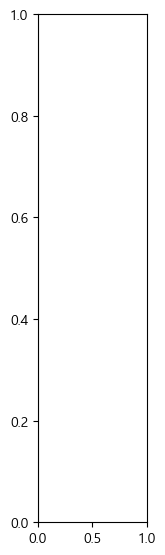

<Figure size 20000x20000 with 0 Axes>

In [93]:
# 히트맵 그리기
plt.figure(figsize=(100, 100))
mask = np.triu(np.ones_like(X_man.corr(), dtype=bool))  # 대각선 아래 부분에만 True가 되도록 마스크 생성
sns.heatmap(X_man.corr(), annot=True, mask=mask, fmt=".2f")  # annot=True로 하여 숫자 표시, fmt=".2f"로 소수점 두 자리까지 표시
plt.savefig('../resources/heatmap_man.png')
plt.show()

In [95]:
# 히트맵 그리기
plt.figure(figsize=(200, 200))
mask = np.triu(np.ones_like(X_woman.corr(), dtype=bool))  # 대각선 아래 부분에만 True가 되도록 마스크 생성
sns.heatmap(X_woman.corr(), annot=True, mask=mask, fmt=".2f")  # annot=True로 하여 숫자 표시, fmt=".2f"로 소수점 두 자리까지 표시
plt.savefig('../resources/heatmap_woman.png')
plt.show()

c:\Users\flinter\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


In [67]:
# 남자 모델
XGBModel_man = XGBClassifier(enable_categorical=True)
XGBModel_man.fit(X_man_train, y_man_train)

# 여자 모델
XGBModel_woman = XGBClassifier(enable_categorical=True)
XGBModel_woman.fit(X_woman_train, y_woman_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
print(XGBModel_man.score(X_man_test, y_man_test))
print(XGBModel_woman.score(X_woman_test, y_woman_test))

0.8585247883917775
0.8740849194729137


In [69]:
def scores(XGBModel, X_test, y_test):
    # 모델 예측
    y_pred = XGBModel.predict(X_test)

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)
    print("정확도:", accuracy)

    # 정밀도 계산
    precision = precision_score(y_test, y_pred)
    print("정밀도:", precision)

    # 재현율 계산
    recall = recall_score(y_test, y_pred)
    print("재현율:", recall)

    # F1 점수 계산
    f1 = f1_score(y_test, y_pred)
    print("F1 점수:", f1)

    # AUC 계산
    auc = roc_auc_score(y_test, y_pred)
    print("AUC:", auc)

    # 혼동 행렬 출력
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("혼동 행렬:")
    print(conf_matrix)

In [70]:
# 남자 모델 평가
scores(XGBModel_man, X_man_test, y_man_test)
# 여성 모델 평가
scores(XGBModel_woman, X_woman_test, y_woman_test)

정확도: 0.8585247883917775
정밀도: 0.7821782178217822
재현율: 0.5851851851851851
F1 점수: 0.6694915254237288
AUC: 0.7661714556830649
혼동 행렬:
[[1183   66]
 [ 168  237]]
정확도: 0.8740849194729137
정밀도: 0.789272030651341
재현율: 0.5036674816625917
F1 점수: 0.6149253731343284
AUC: 0.7350654481483689
혼동 행렬:
[[1585   55]
 [ 203  206]]


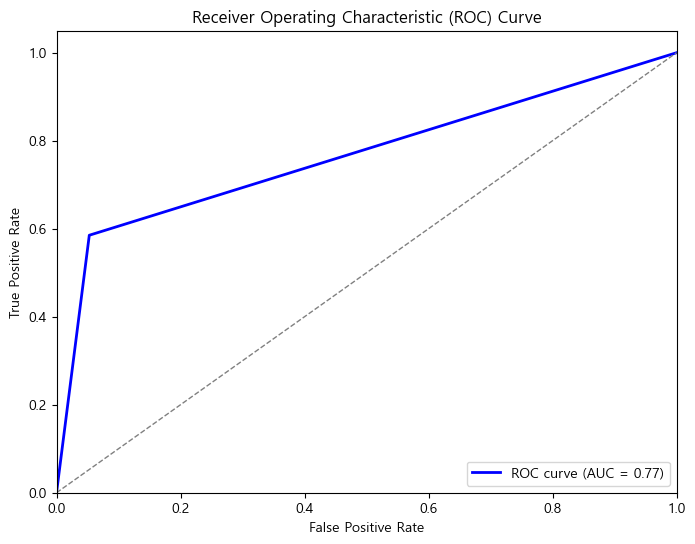

In [71]:
# Calculate ROC curve
y_pred = XGBModel_man.predict(X_man_test)
fpr, tpr, thresholds = roc_curve(y_man_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_man_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

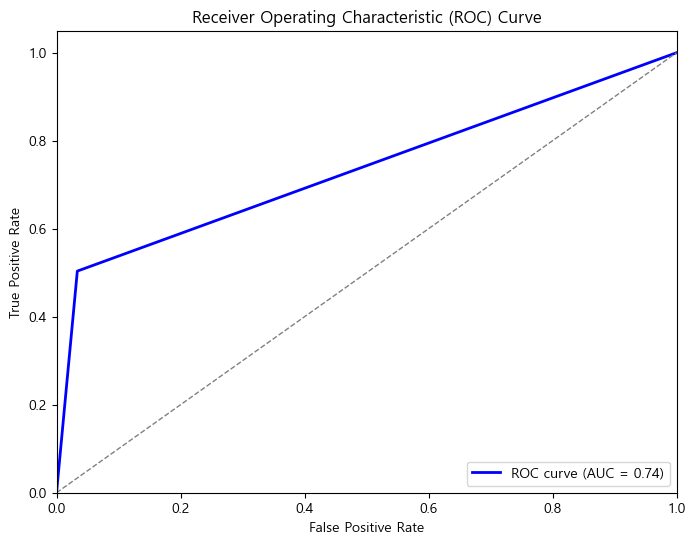

In [72]:
# Calculate ROC curve
y_pred = XGBModel_woman.predict(X_woman_test)
fpr, tpr, thresholds = roc_curve(y_woman_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_woman_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [76]:
def features(XGBModel, X_train):
    # Assuming you have a model that provides feature importances (e.g., XGBoost)
    importances = XGBModel.feature_importances_

    # Create a DataFrame to store feature importances
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

    # Sort the DataFrame by feature importances in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    # Plot feature importances
    plt.figure(figsize=(10, 80))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Plot')
    plt.show()

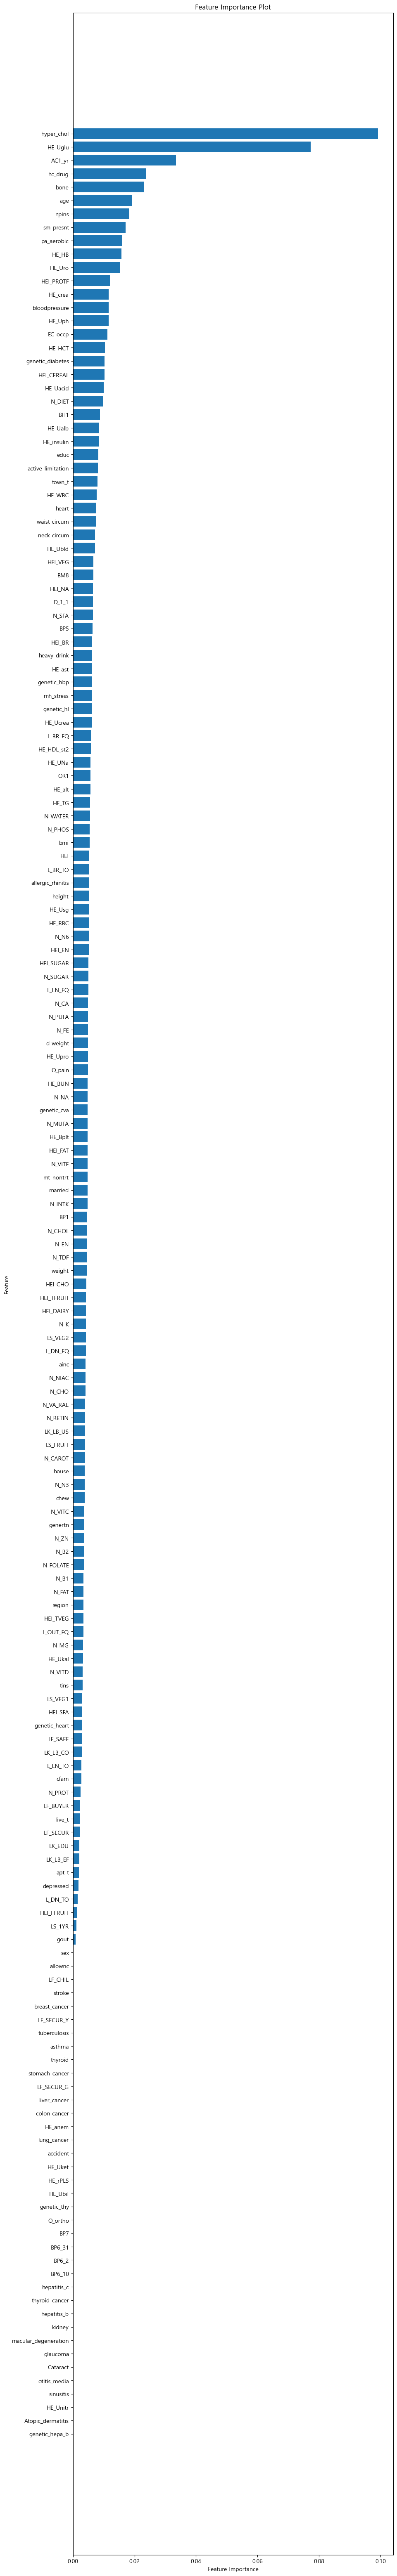

In [77]:
# 남자 모델 피쳐중요도
features(XGBModel_man, X_man_train)

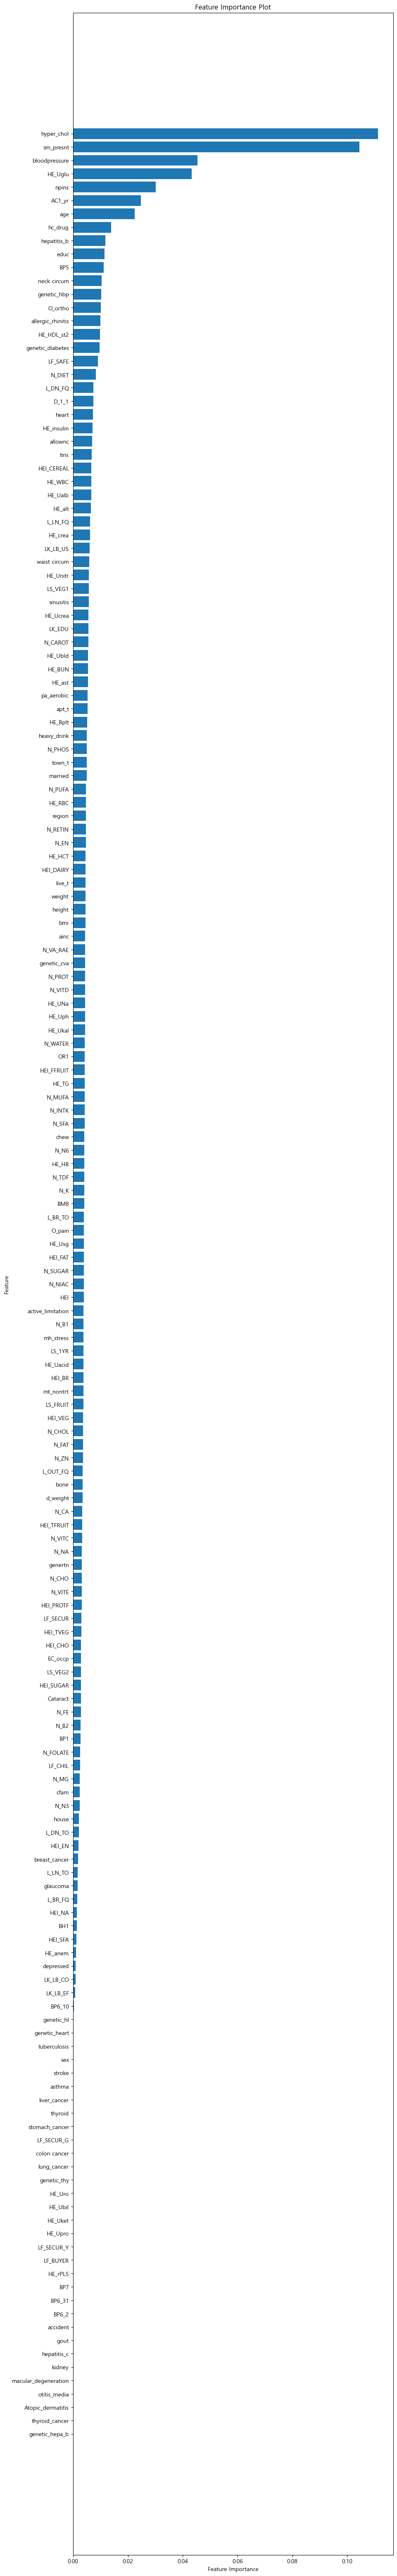

In [78]:
# 여자 모델 피쳐중요도
features(XGBModel_woman, X_woman_train)

In [79]:
# shap 남자버전
shap_values_man = shap.TreeExplainer(XGBModel_man).shap_values(X_man_test)
shap_interaction_values_man = shap.TreeExplainer(XGBModel_man).shap_interaction_values(
    X_man_test
)

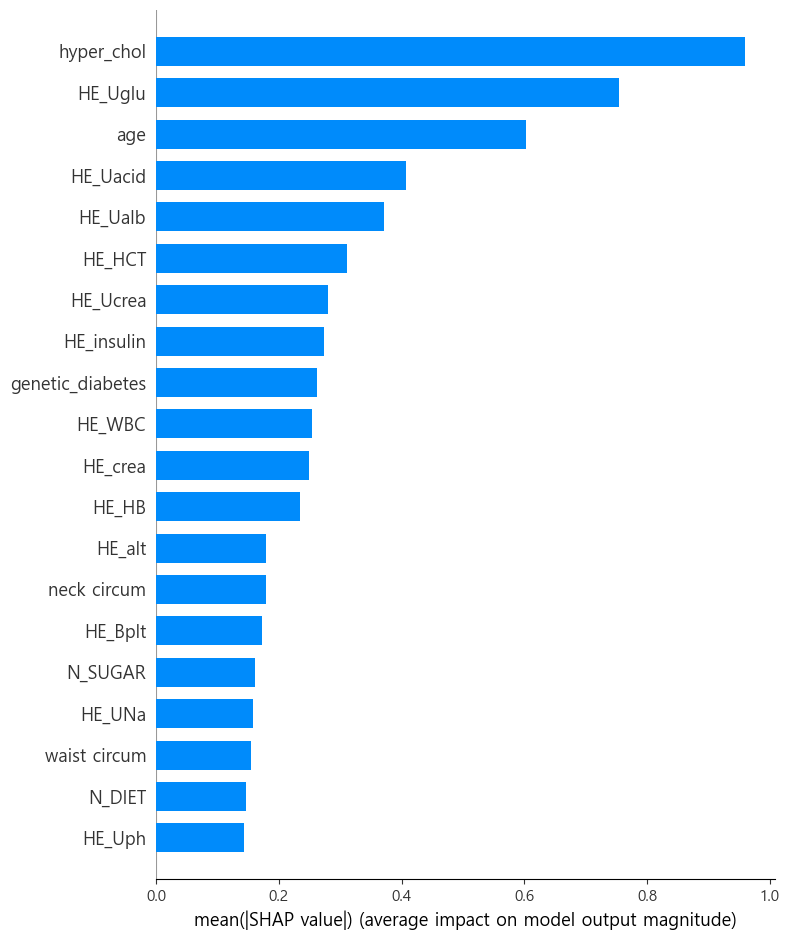

In [80]:
shap.summary_plot(shap_values_man, X_man_test, plot_type="bar")

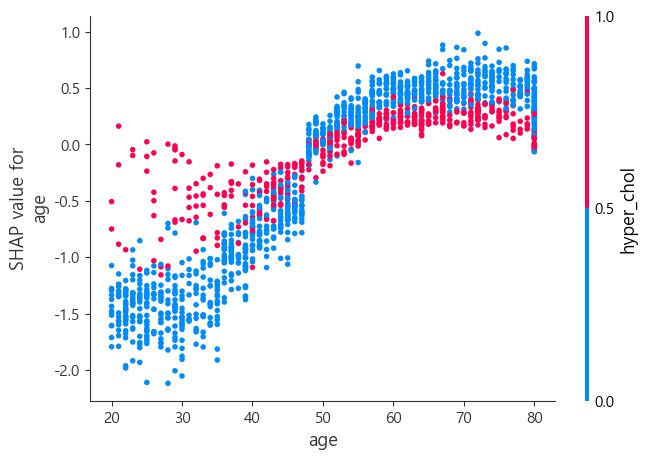

In [81]:
shap.dependence_plot('age', shap_values_man, X_man_test)

In [82]:
shap.force_plot(shap.TreeExplainer(XGBModel_man).expected_value, shap_values_man[0,:], X_man_test.iloc[0,:])

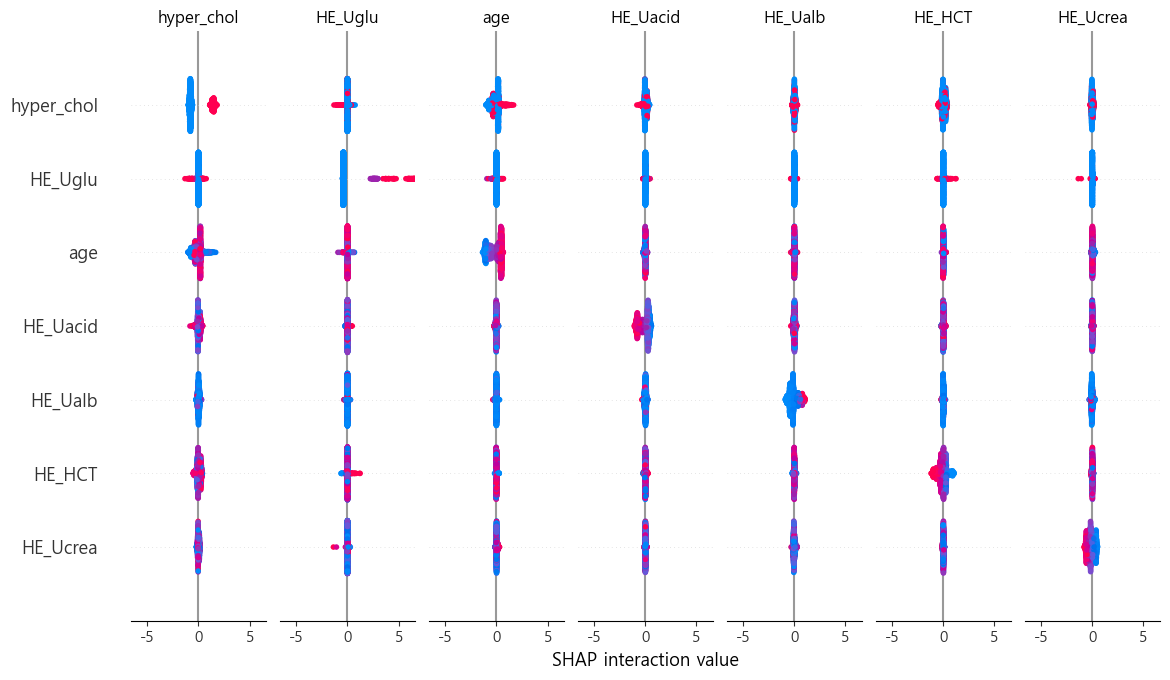

In [83]:
shap.summary_plot(shap_interaction_values_man, X_man_test)

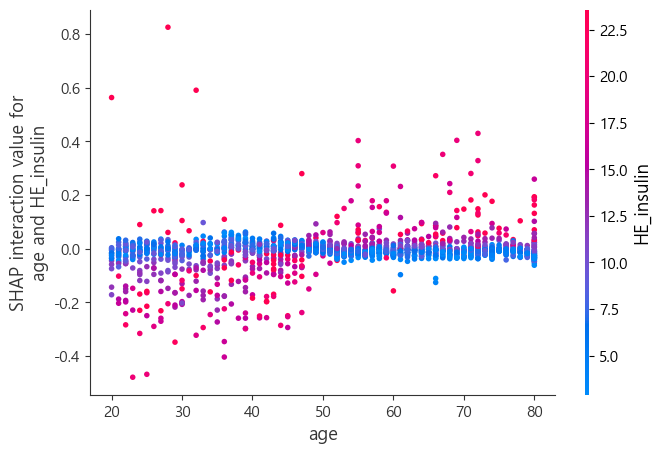

In [84]:
shap.dependence_plot(('age', 'HE_insulin'), shap_interaction_values_man, X_man_test)

In [85]:
# 남자 SHAP 값 계산
explainer_man = shap.Explainer(XGBModel_man, X_man_train)
shap_values_man = explainer_man(X_man_test)

def waterfall_plot_idx_man(i):
    index = i  # 원하는 예측의 인덱스
    shap.waterfall_plot(shap_values_man[index], max_display=20, show=False)
    plt.show()

c:\Users\flinter\anaconda3\Lib\site-packages\shap\plots\_waterfall.py:237: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
c:\Users\flinter\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


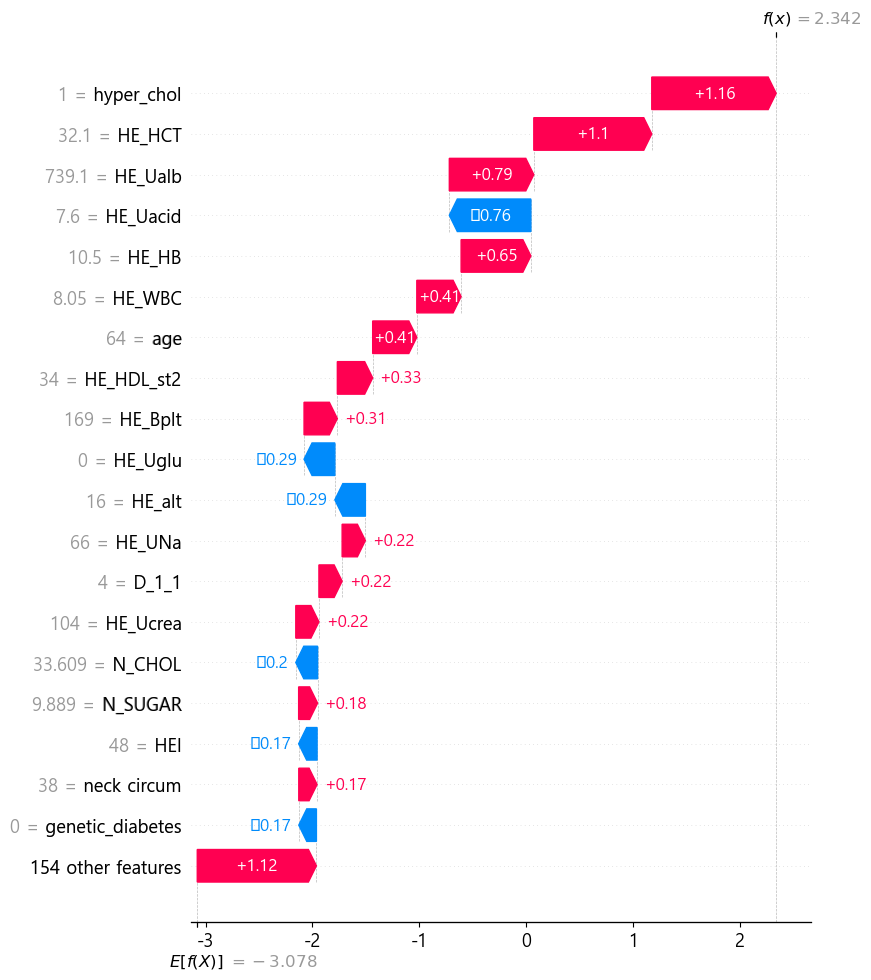

In [86]:
waterfall_plot_idx_man(1)

In [87]:
# shap 여자버전
shap_values_woman = shap.TreeExplainer(XGBModel_woman).shap_values(X_woman_test)
shap_interaction_values_woman = shap.TreeExplainer(XGBModel_woman).shap_interaction_values(
    X_woman_test
)

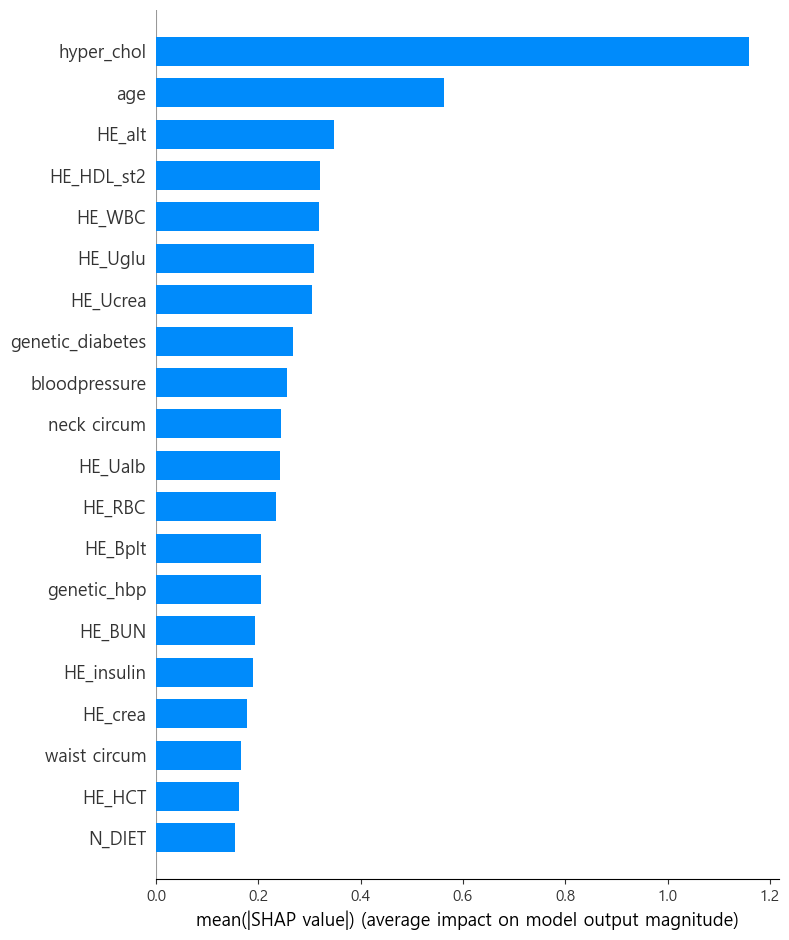

In [88]:
shap.summary_plot(shap_values_woman, X_woman_test, plot_type="bar")

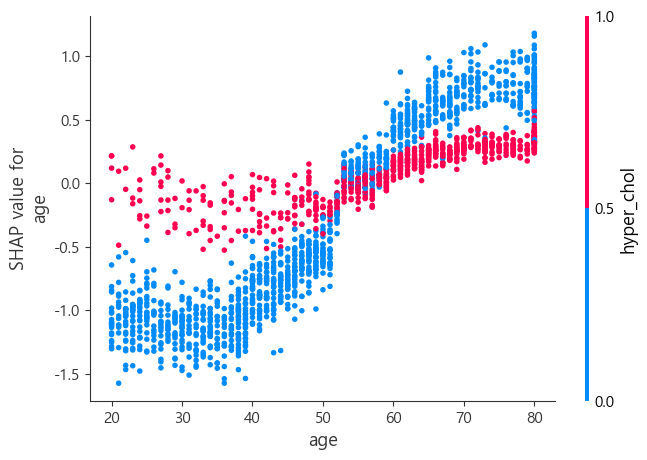

In [89]:
shap.dependence_plot('age', shap_values_woman, X_woman_test)

In [90]:
shap.force_plot(shap.TreeExplainer(XGBModel_woman).expected_value, shap_values_woman[0,:], X_woman_test.iloc[0,:])

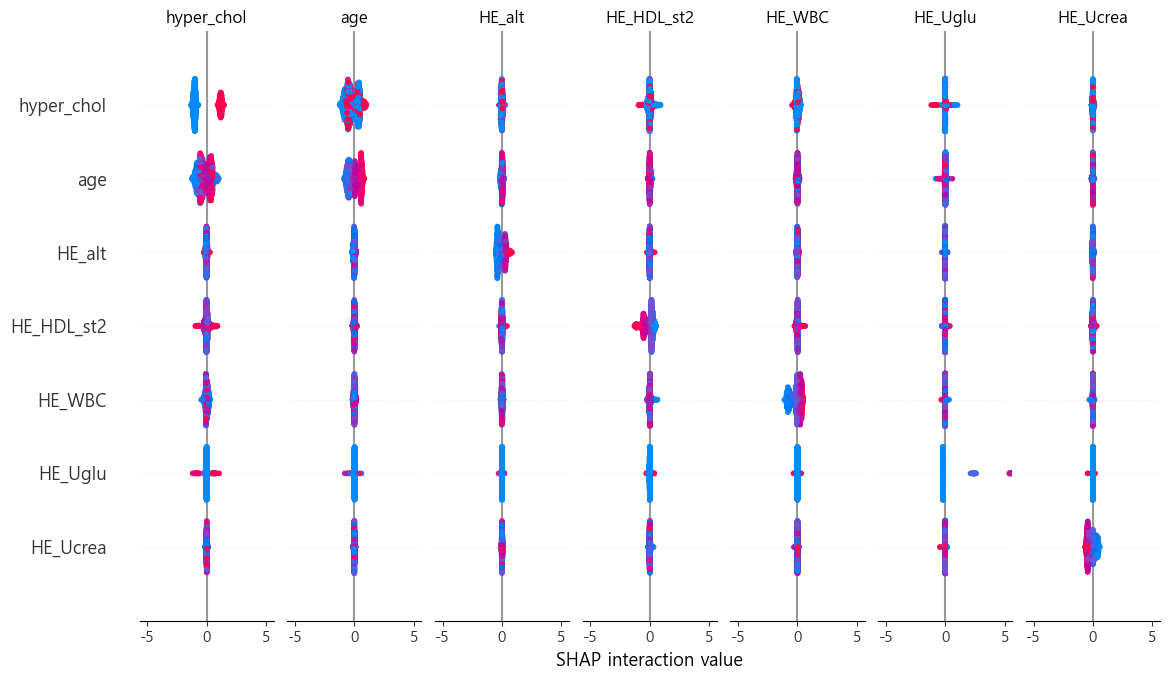

In [96]:
shap.summary_plot(shap_interaction_values_woman, X_woman_test)

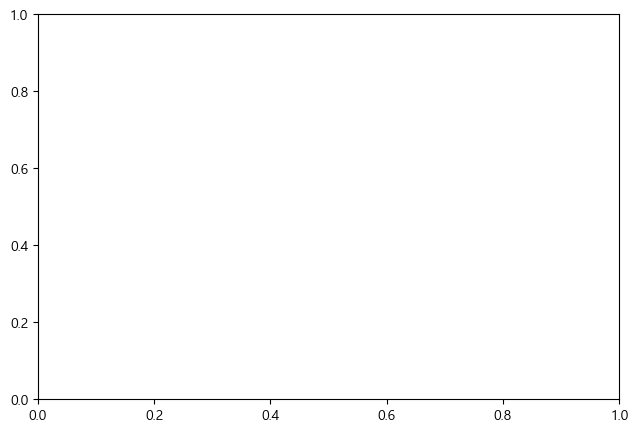

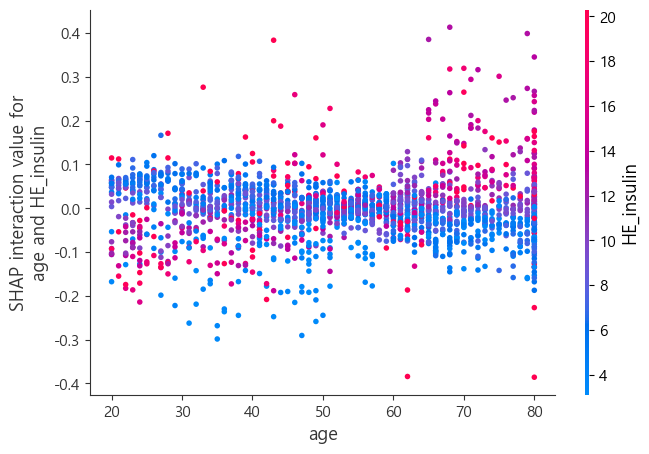

In [98]:
shap.dependence_plot(('age', 'HE_insulin'), shap_interaction_values_woman, X_woman_test)

In [100]:
# 여자 SHAP 값 계산
explainer_woman = shap.Explainer(XGBModel_woman, X_woman_train)
shap_values_woman = explainer_woman(X_woman_test)

def waterfall_plot_idx_woman(i):
    index = i  # 원하는 예측의 인덱스
    shap.waterfall_plot(shap_values_woman[index], max_display=20, show=False)
    plt.show()

c:\Users\flinter\anaconda3\Lib\site-packages\shap\plots\_waterfall.py:237: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
c:\Users\flinter\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


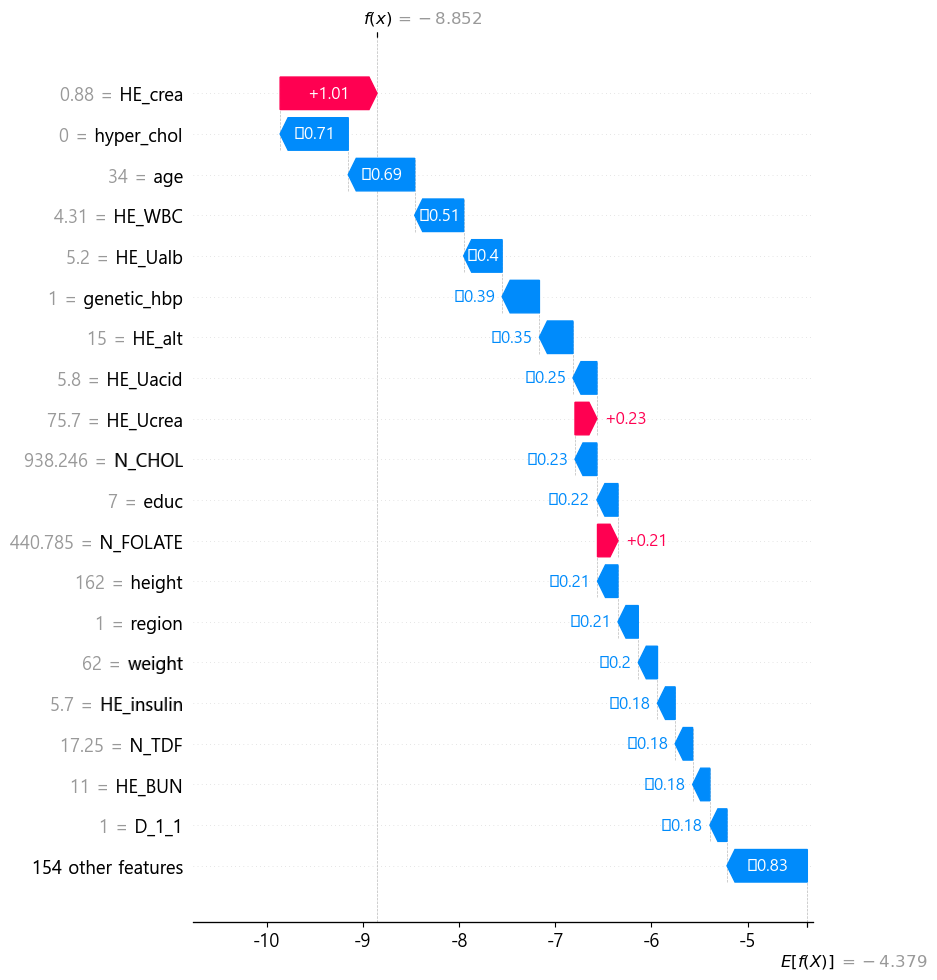

In [101]:
waterfall_plot_idx_woman(1)

In [ ]:
# 여자 데이터에 여성건강, 임신 관련 데이터 추가 진행